In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits

In [2]:
print(os.getcwd())  
file_path = './M87_NEW.fits'
print(os.path.exists(file_path)) 

/drive/notebooks/PIANETI_STELLE_ETC
True


Per **estrapolare la lunghezza d onda**  (wavelength) da un file FITS utilizzando Astropy, devi verificare se il file contiene i dati spettrali o se la lunghezza d onda è codificata nei metadati dell immagine (di solito nel header del file FITS).

**Header** contiene informazioni come la calibrazione spettrale, la risoluzione, il riferimento della lunghezza d'onda, ecc. I parametri più comuni includono:

- CRVAL1: Valore della lunghezza d'onda alla posizione di riferimento (tipicamente il primo pixel).
- CDELT1: Incremente di lunghezza d'onda per ogni pixel (dispersivo).
- CRPIX1: Il pixel di riferimento (tipicamente 1).

La formula per calcolare la lunghezza d'onda è: 

$$
\lambda_i = CRVAL1 + (i - CRPIX1) \times CDELT1
$$


In [4]:
# Apri il file FITS
with fits.open(file_path) as hdu_list:
    header = hdu_list[0].header  # Header della prima estensione
    print(repr(header))  # Stampa tutte le informazioni dell'header

SIMPLE  =                    T / Written by SkyView Fri Oct 11 06:44:56 EDT 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =           187.705931 / Reference longitude                            
CRVAL2  =            12.391123 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [7]:
import numpy as np

# Estrai i valori dall'header
crval1 = header['CRVAL1']  # Valore della lunghezza d'onda al pixel di riferimento
cdelt1 = header['CDELT1']  # Incremento di lunghezza d'onda per pixel
crpix1 = header['CRPIX1']  # Pixel di riferimento (spesso 1)

# Informazione estratta dal header (da adattare alle dimensioni reali dell'immagine)
n_pixels = 9000

# Crea un array con i numeri di pixel
pixel_indices = np.arange(1, n_pixels + 1)

# Calcola la lunghezza d'onda per ciascun pixel
wavelengths = crval1 + (pixel_indices - crpix1) * cdelt1

# Stampa o utilizza le lunghezze d'onda
print(wavelengths)

[187.77652822 187.776056   187.77558377 ... 183.52794509 183.52747286
 183.52700064]


Se il file **FITS contiene dati spettrali** (come nel caso di spettri o dati da spettrografi), la lunghezza d onda sarà direttamente collegata a ciascun pixel del sensore o rilevatore, come nel caso di una wavelength solution. Le informazioni relative alla lunghezza d'onda possono essere rappresentate come un asse spettrale nei dati.
Puoi anche usare l attributo **WCS** (World Coordinate System) per estrapolare coordinate come la lunghezza d onda da immagini calibrate spettralmente.

**OSS:** NON CONTIENE DATI SPETTRALI IL FILE DI INPUT M87.fits

In [ ]:
from astropy.wcs import WCS
# Estrai WCS (World Coordinate System) dall'header
wcs = WCS(header)
# Converti i numeri di pixel in coordinate di lunghezza d'onda
# Se l'asse 0 è la lunghezza d'onda, puoi fare:
wavelength = wcs.pixel_to_world(np.arange(n_pixels))
print(wavelength)

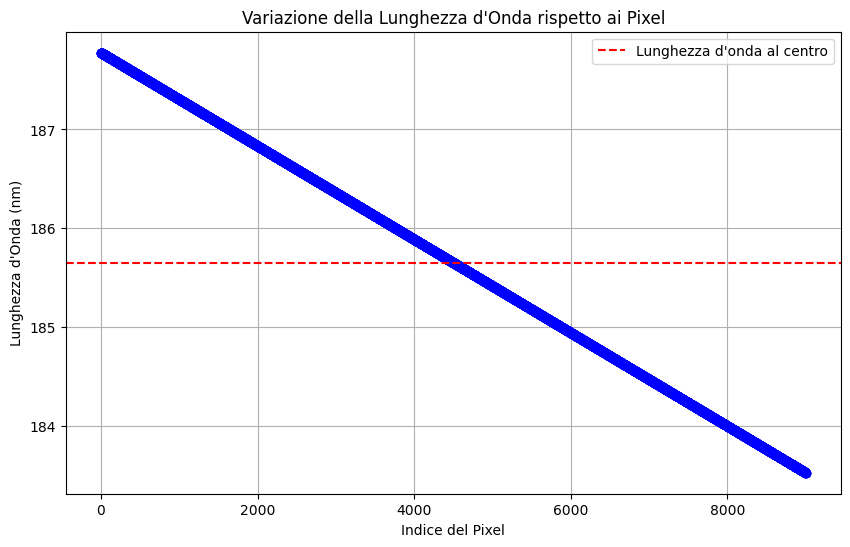

In [10]:
# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(pixel_indices, wavelengths, marker='o', linestyle='-', color='b')
plt.title('Variazione della Lunghezza d\'Onda rispetto ai Pixel')
plt.xlabel('Indice del Pixel')
plt.ylabel('Lunghezza d\'Onda (nm)')  # Cambia l'unità in base ai tuoi dati
plt.grid(True)
plt.axhline(y=wavelengths[n_pixels // 2], color='r', linestyle='--', label='Lunghezza d\'onda al centro')
plt.legend()
plt.show()

In [16]:
print(type(wavelengths ))
# Calcolo dei valori minimi e massimi
min_val = np.min(wavelengths)
max_val = np.max(wavelengths)

# Normalizzazione Min-Max- Esiste anche la Z normalizzazione ma il risulato è lo stesso
normalized_wavelengths = (wavelengths - min_val) / (max_val - min_val)

print("Wavelengths normalizzati (Min-Max):")
print(normalized_wavelengths)
wavelengths = normalized_wavelengths

<class 'numpy.ndarray'>
Wavelengths normalizzati (Min-Max):
[1.00000000e+00 9.99888877e-01 9.99777753e-01 ... 2.22246916e-04
 1.11123458e-04 0.00000000e+00]


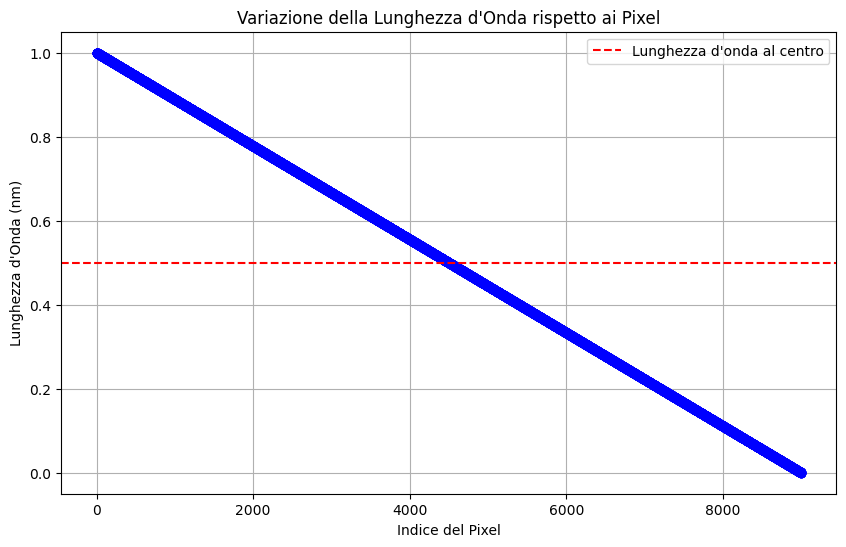

In [15]:
# Crea il grafico
plt.figure(figsize=(10, 6))
plt.plot(pixel_indices, wavelengths, marker='o', linestyle='-', color='b')
plt.title('Variazione della Lunghezza d\'Onda rispetto ai Pixel')
plt.xlabel('Indice del Pixel')
plt.ylabel('Lunghezza d\'Onda (nm)')  # Cambia l'unità in base ai tuoi dati
plt.grid(True)
plt.axhline(y=wavelengths[n_pixels // 2], color='r', linestyle='--', label='Lunghezza d\'onda al centro')
plt.legend()
plt.show()

Un **andamento rettilineo** nella variazione della lunghezza d onda è un po **troppo strano** per i miei gusti , forse è dovuto alla pulizia dei dati originali 